
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [245]:
# Ваш код здесь
import pandas as pd

### 2. Загрузка данных

In [259]:
# Ваш код здесь
df = pd.read_csv('4.7 sales.csv')

In [260]:
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

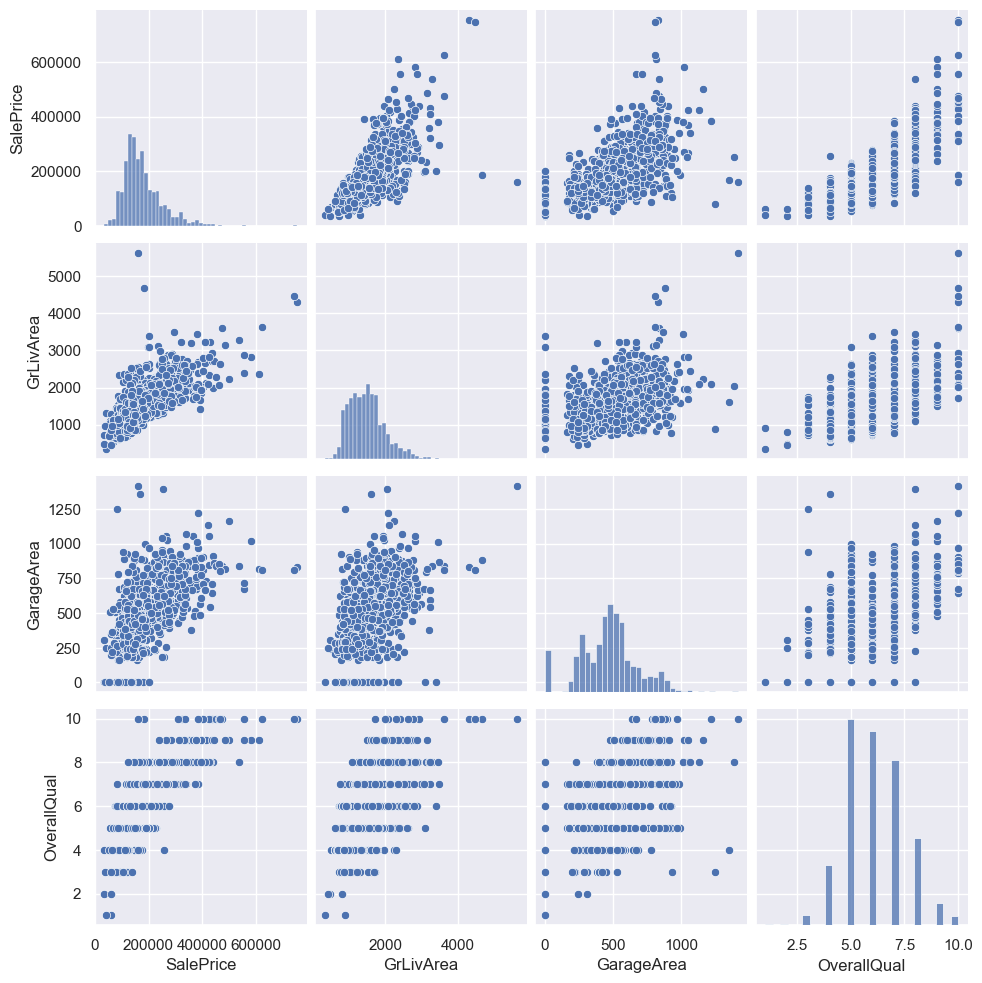

In [248]:
# Ваш код здесь
import seaborn as sns

# Предполагая, что у вас есть объект DataFrame с именем 'df'
sns.pairplot(df)


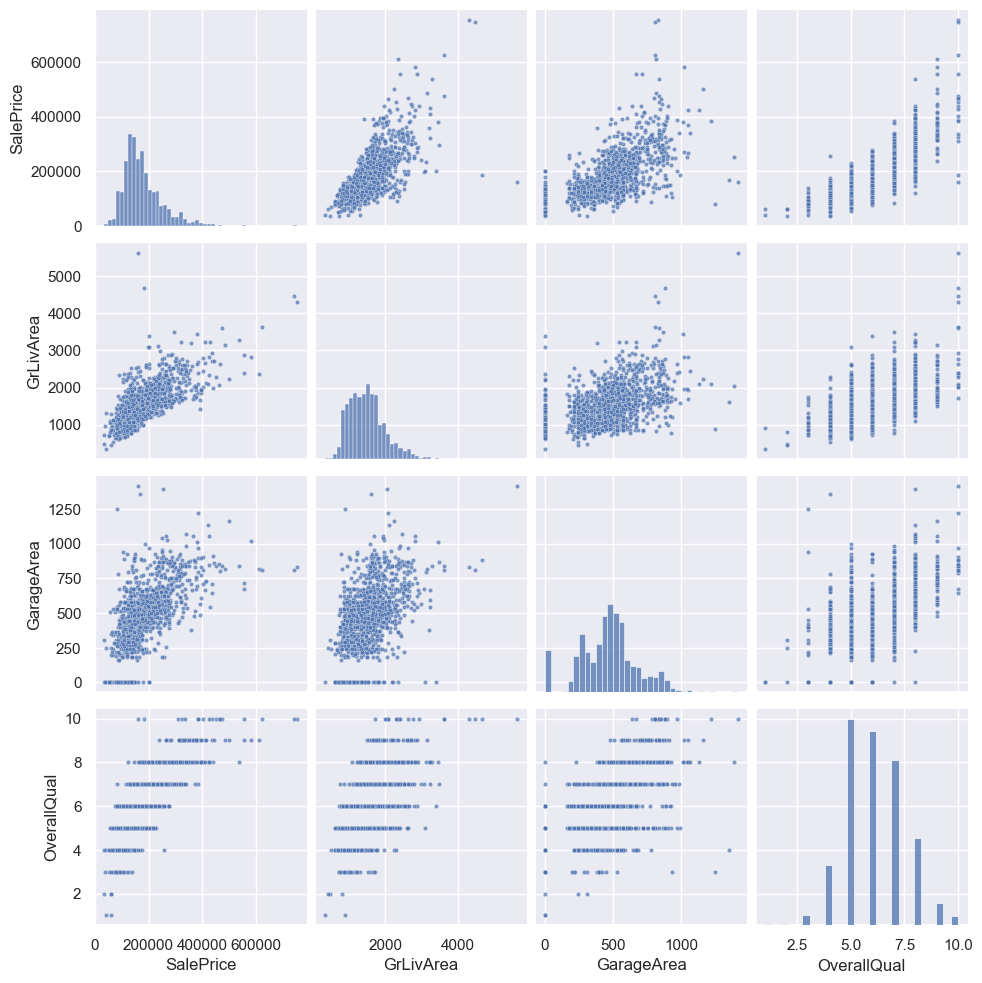

In [249]:
sns.pairplot(df, plot_kws={'alpha': 0.7, 's': 10})



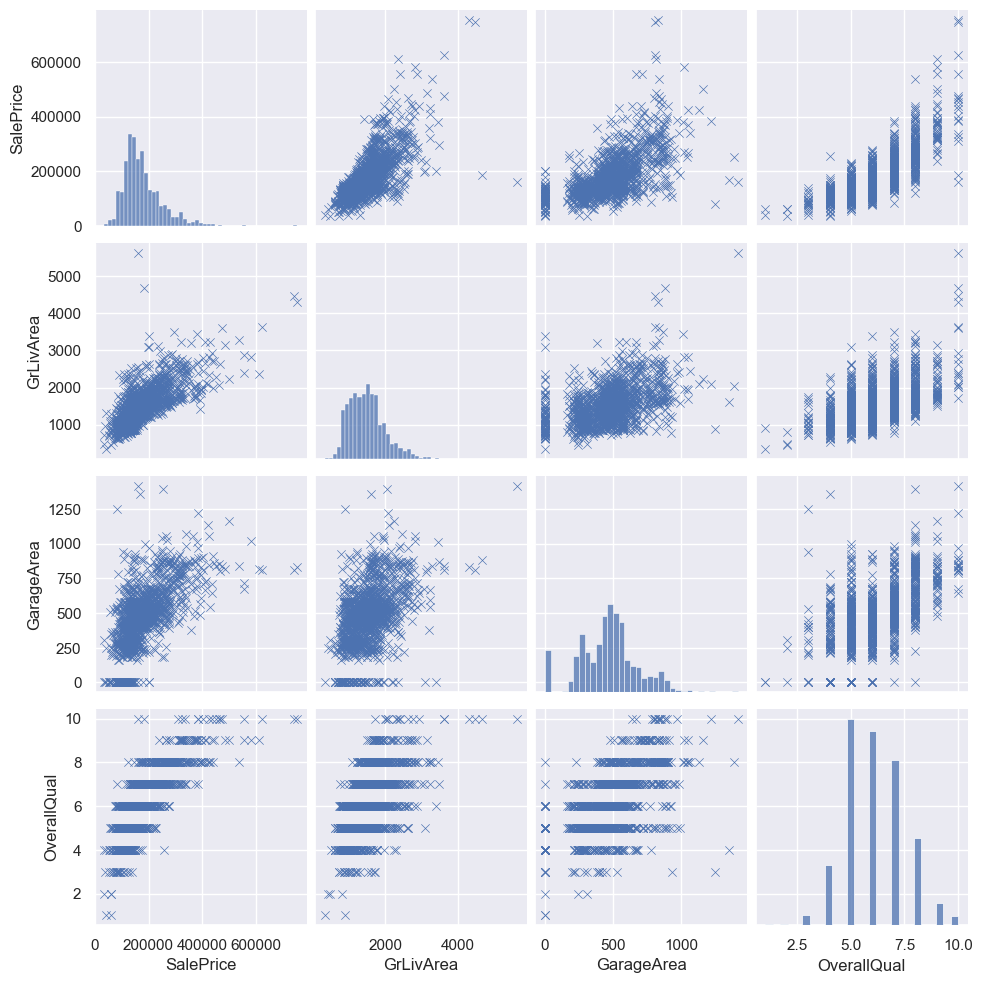

In [224]:
sns.pairplot(df, markers='x')


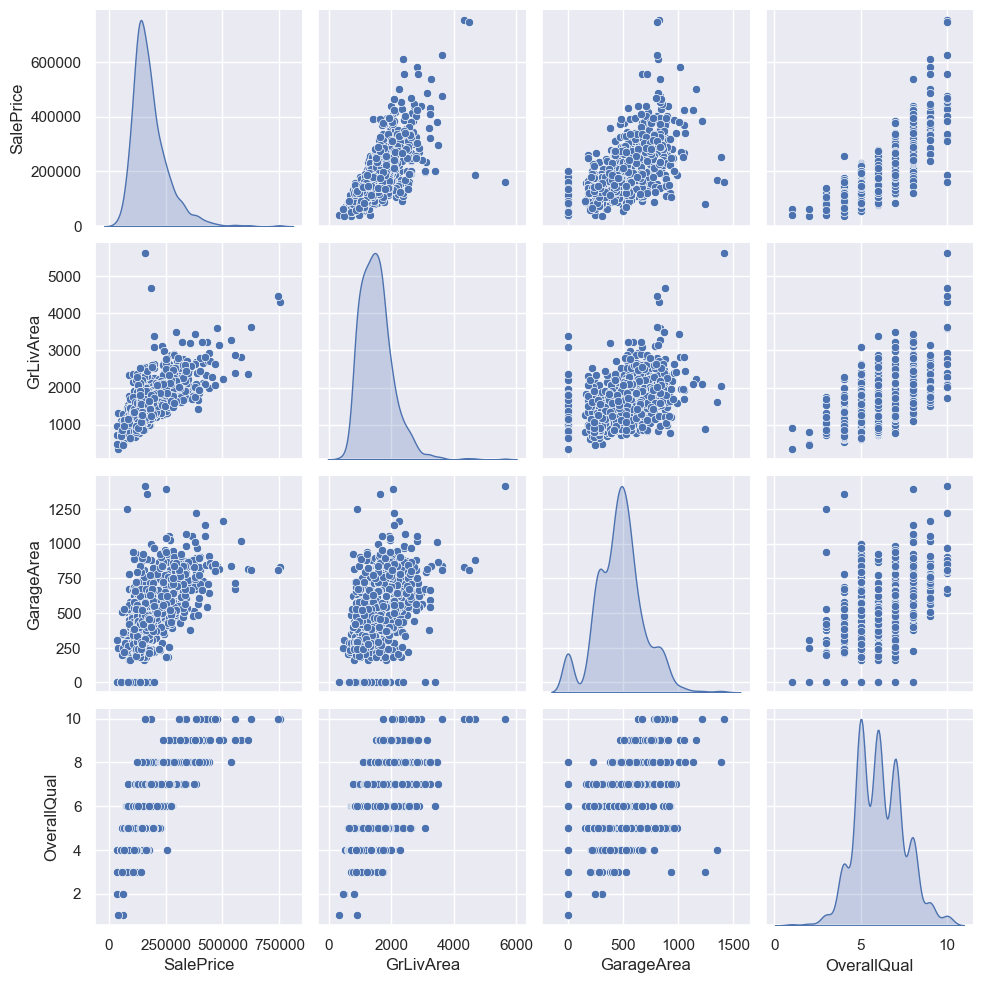

In [225]:
sns.pairplot(df, diag_kind='kde')


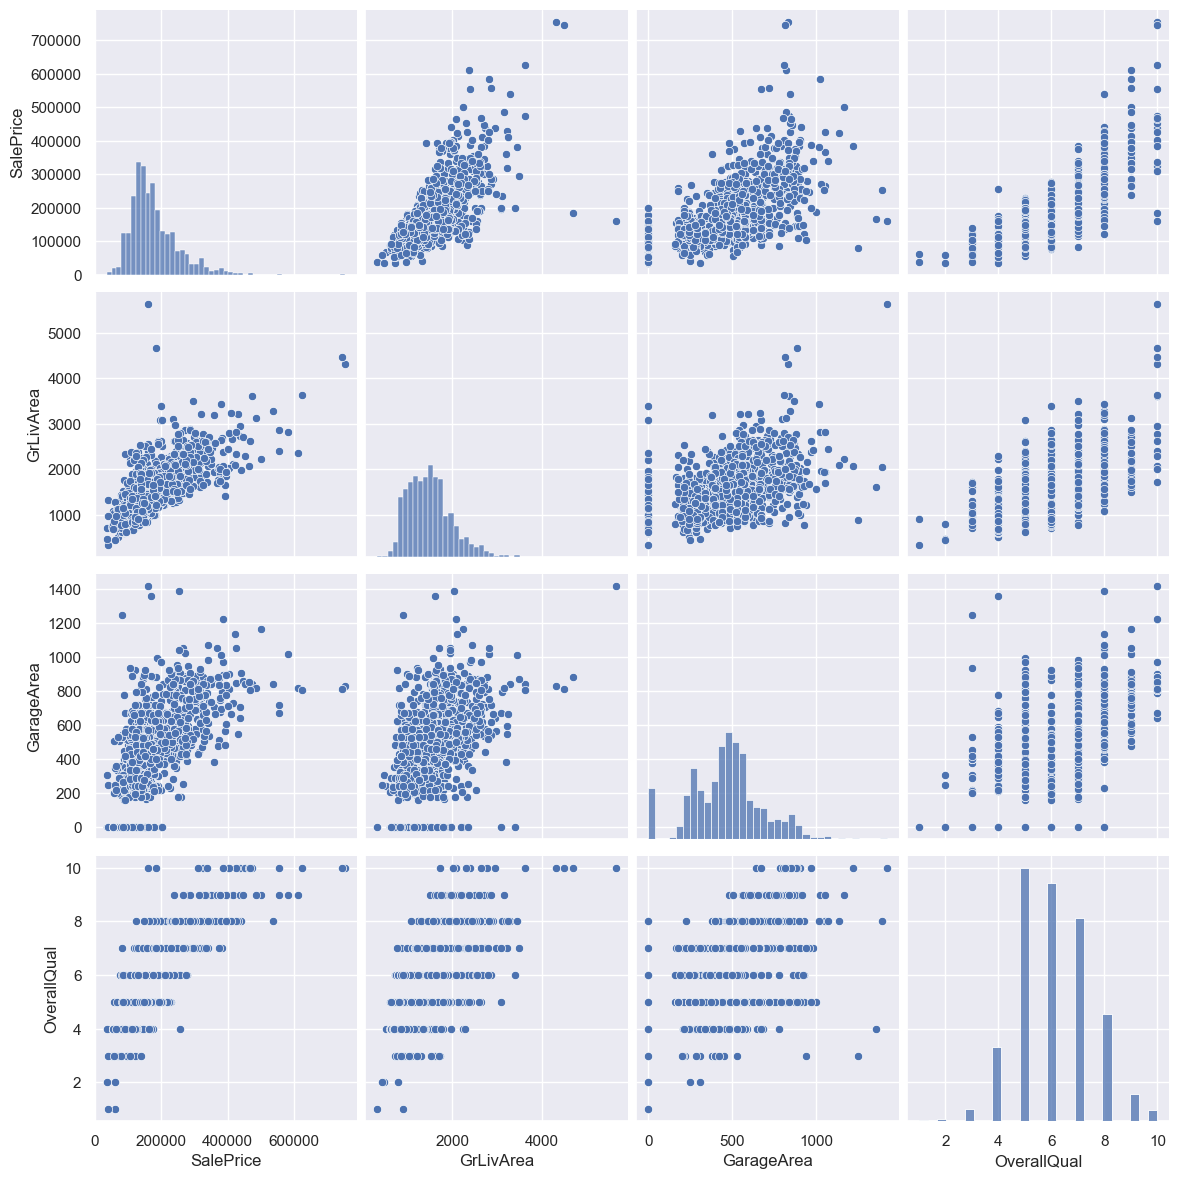

In [226]:
sns.pairplot(df, height=3)


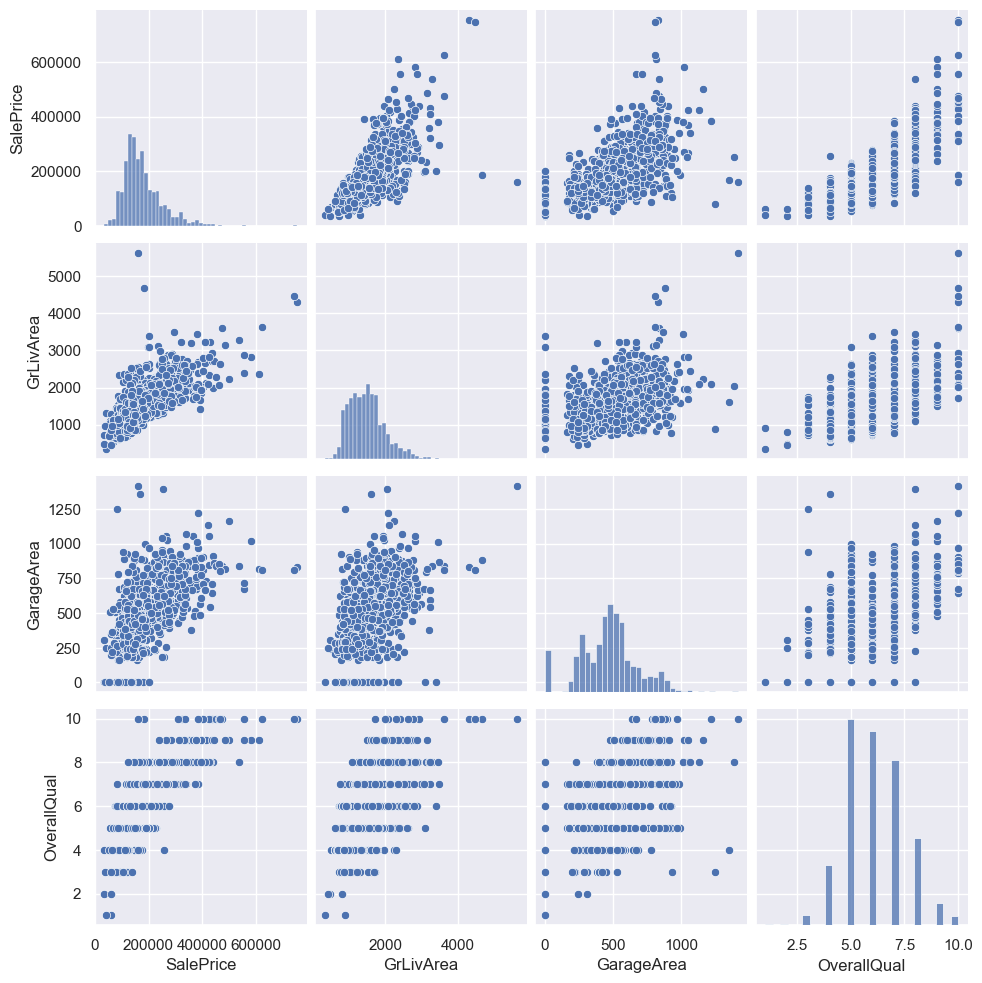

In [227]:
sns.pairplot(df, palette='husl')


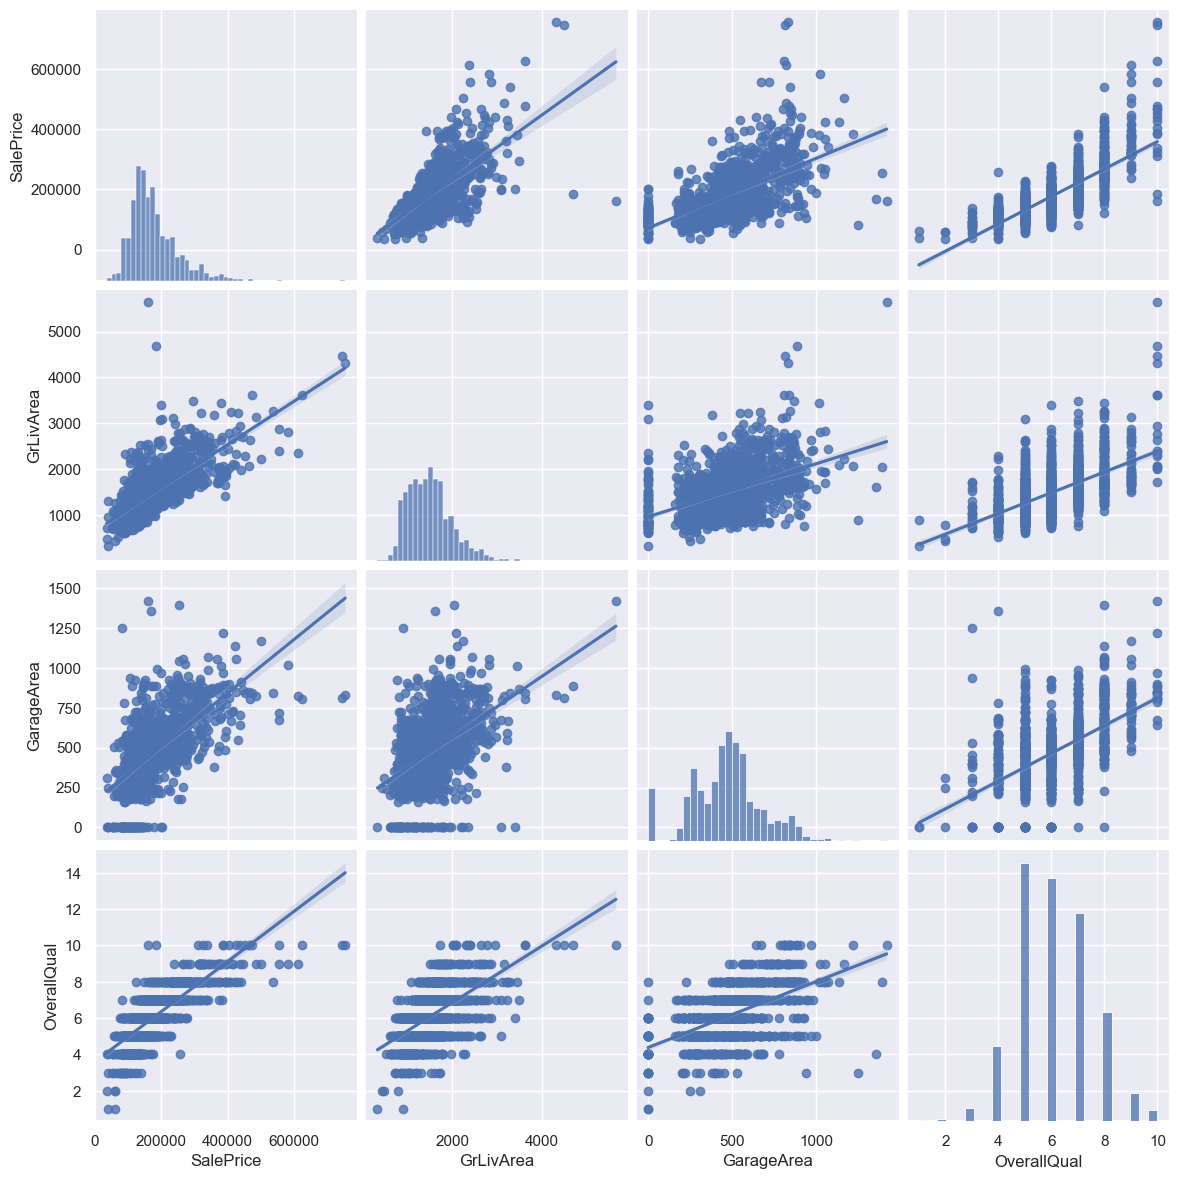

In [228]:
#sns.pairplot(df, kind='reg')
sns.set(style='darkgrid')
sns.pairplot(df, kind='reg', height=3)


In [261]:
# Проверка пропущенных значений в df
missing_values = df.isnull().sum()

print(missing_values)


SalePrice        0
GrLivArea        0
GarageArea       0
OverallQual      0
Street           0
SaleCondition    0
dtype: int64


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


In [231]:
# Вывод уникальных значений в каждом столбце df
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Уникальные значения в столбце {column}:")
    print(unique_values)
    print()

Уникальные значения в столбце SalePrice:
[208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 154000 256300 134800 306000 207500  68500  40000
 149350 179900 165500 277500 309000 145000 153000 109000  82000 160000
 170000 130250 141000 319900 239686 249700 113000 127000 177000 114500
 110000 385000 130000 180500 172500 196500 438780 124900 158000 101000
 202500 219500 317000 180000 226000  80000 225000 244000 185000 144900
 107400  91000 135750 136500 193500 153500 245000 126500 168500 260000
 174000 164500  85000 123600 109900  98600 163500 133900 204750 214000
  94750  83000 128950 205000 178000 118964 198900 169500 100000 115000
 190000 136900 383970 217000 259500 176000 155000 320000 163990 136000
 153900 181000  84500 128000  87000 150000 150750 220000 171000 231500
 166000 204000 125000 105000 222500 122000 372402 235000  79000 109500
 269500 254900 162500 412500 103200 

In [263]:
# Замените 'df' на имя вашего датафрейма
unique_counts = df.nunique()

print(unique_counts)

SalePrice        663
GrLivArea        861
GarageArea       441
OverallQual       10
Street             2
SaleCondition      6
dtype: int64


In [264]:
# Создание DataFrame с несколькими категориальными переменными
# df = pd.DataFrame({'Street': ['Pave', 'Grvl'],
#                    'SaleCondition': ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']})

# Преобразование нескольких категориальных переменных
dummies = pd.get_dummies(df[['Street', 'SaleCondition']])
dummies

,Street_Grvl,Street_Pave,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0
3,0,1,1,0,0,0,0,0
4,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1455,0,1,0,0,0,0,1,0
1456,0,1,0,0,0,0,1,0
1457,0,1,0,0,0,0,1,0
1458,0,1,0,0,0,0,1,0


In [265]:
# Присоединение фиктивных переменных к исходному DataFrame
df = pd.concat([df, dummies], axis=1)
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition,Street_Grvl,Street_Pave,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,1710,548,7,Pave,Normal,0,1,0,0,0,0,1,0
1,181500,1262,460,6,Pave,Normal,0,1,0,0,0,0,1,0
2,223500,1786,608,7,Pave,Normal,0,1,0,0,0,0,1,0
3,140000,1717,642,7,Pave,Abnorml,0,1,1,0,0,0,0,0
4,250000,2198,836,8,Pave,Normal,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal,0,1,0,0,0,0,1,0
1456,210000,2073,500,6,Pave,Normal,0,1,0,0,0,0,1,0
1457,266500,2340,252,7,Pave,Normal,0,1,0,0,0,0,1,0
1458,142125,1078,240,5,Pave,Normal,0,1,0,0,0,0,1,0


In [266]:
# Удаление столбцов "Street" и "SaleCondition"
df = df.drop(['Street', 'SaleCondition'], axis=1)
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street_Grvl,Street_Pave,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,1710,548,7,0,1,0,0,0,0,1,0
1,181500,1262,460,6,0,1,0,0,0,0,1,0
2,223500,1786,608,7,0,1,0,0,0,0,1,0
3,140000,1717,642,7,0,1,1,0,0,0,0,0
4,250000,2198,836,8,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,460,6,0,1,0,0,0,0,1,0
1456,210000,2073,500,6,0,1,0,0,0,0,1,0
1457,266500,2340,252,7,0,1,0,0,0,0,1,0
1458,142125,1078,240,5,0,1,0,0,0,0,1,0


In [256]:
import pandas as pd

# Замените 'df' на имя вашего датафрейма
df['SalePrice_Category'] = pd.cut(df['SalePrice'], bins=4, labels=['Category 1', 'Category 2', 'Category 3', 'Category 4'])

df


,SalePrice,GrLivArea,GarageArea,OverallQual,Street_Grvl,Street_Pave,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice_Category
0,208500,1710,548,7,0,1,0,0,0,0,1,0,Category 1
1,181500,1262,460,6,0,1,0,0,0,0,1,0,Category 1
2,223500,1786,608,7,0,1,0,0,0,0,1,0,Category 2
3,140000,1717,642,7,0,1,1,0,0,0,0,0,Category 1
4,250000,2198,836,8,0,1,0,0,0,0,1,0,Category 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,1647,460,6,0,1,0,0,0,0,1,0,Category 1
1456,210000,2073,500,6,0,1,0,0,0,0,1,0,Category 1
1457,266500,2340,252,7,0,1,0,0,0,0,1,0,Category 2
1458,142125,1078,240,5,0,1,0,0,0,0,1,0,Category 1


### 4. Разделение на обучающую и тестовую выборки

In [267]:
# Ваш код здесь
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [268]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression

# Создание объекта модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающих данных
model.fit(X_train, y_train)



LinearRegression()

### 6. Получение предсказаний для обучающей и тестовой выборок

In [24]:
# Ваш код здесь
# Получение предсказаний на обучающих данных
y_pred_train = model.predict(X_train)

# Получение предсказаний на тестовых данных
y_pred_test = model.predict(X_test)


### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

In [26]:
# Ваш код здесь
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Оценка качества модели на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(mae_train)
# Оценка качества модели на тестовой выборке
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Вывод результатов с использованием фигурных скобок
print("MAE на обучающей выборке: {:.2f}".format(mae_train))
print("MSE на обучающей выборке: {:.2f}".format(mse_train))
print("MAE на тестовой выборке: {:.2f}".format(mae_test))
print("MSE на тестовой выборке: {:.2f}".format(mse_test))

26330.103520795346
MAE на обучающей выборке: 26330.10
MSE на обучающей выборке: 1610445283.26
MAE на тестовой выборке: 26678.52
MSE на тестовой выборке: 1579708286.28


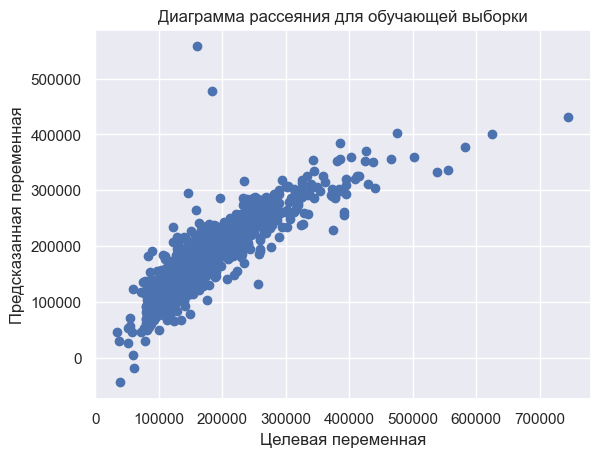

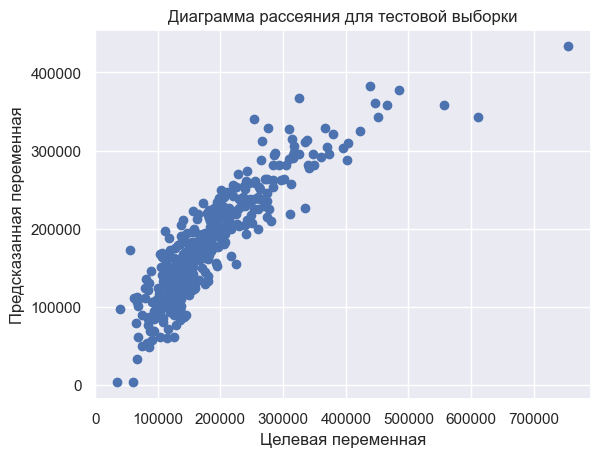

In [27]:
import matplotlib.pyplot as plt

# Построение диаграммы рассеяния для обучающей выборки
plt.scatter(y_train, y_train_pred)
plt.xlabel("Целевая переменная")
plt.ylabel("Предсказанная переменная")
plt.title("Диаграмма рассеяния для обучающей выборки")
plt.show()

# Построение диаграммы рассеяния для тестовой выборки
plt.scatter(y_test, y_pred_test)
plt.xlabel("Целевая переменная")
plt.ylabel("Предсказанная переменная")
plt.title("Диаграмма рассеяния для тестовой выборки")
plt.show()


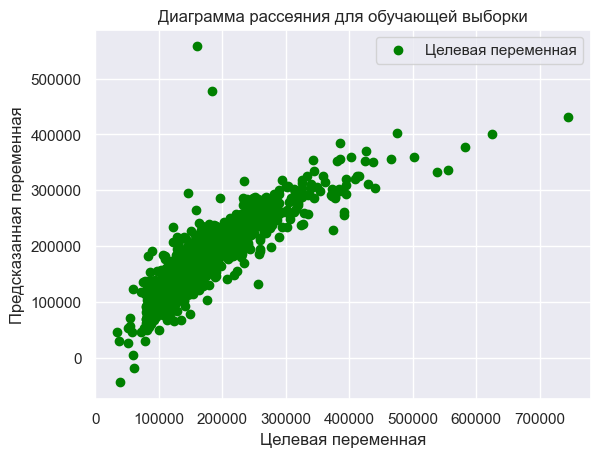

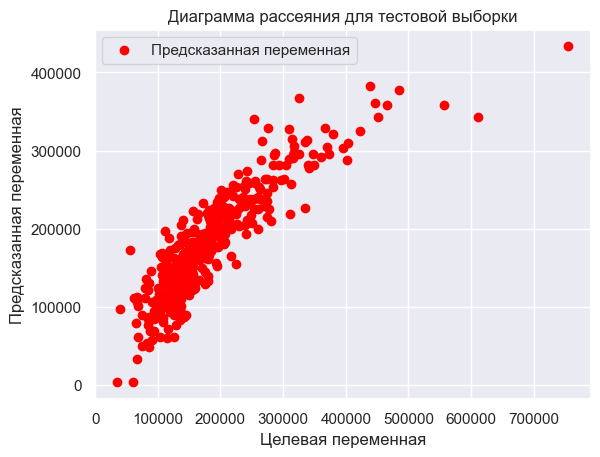

In [28]:
import matplotlib.pyplot as plt

# Построение диаграммы рассеяния для обучающей выборки
plt.scatter(y_train, y_train_pred, color='green', label='Целевая переменная')
plt.xlabel("Целевая переменная")
plt.ylabel("Предсказанная переменная")
plt.title("Диаграмма рассеяния для обучающей выборки")
plt.legend()
plt.show()

# Построение диаграммы рассеяния для тестовой выборки
plt.scatter(y_test, y_pred_test, color='red', label='Предсказанная переменная')
plt.xlabel("Целевая переменная")
plt.ylabel("Предсказанная переменная")
plt.title("Диаграмма рассеяния для тестовой выборки")
plt.legend()
plt.show()


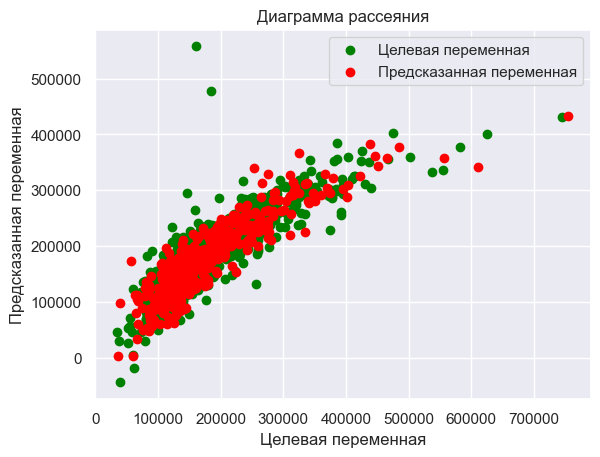

In [29]:
import matplotlib.pyplot as plt

# Построение диаграммы рассеяния для обучающей выборки
plt.scatter(y_train, y_train_pred, color='green', label='Целевая переменная')
# Построение диаграммы рассеяния для тестовой выборки
plt.scatter(y_test, y_pred_test, color='red', label='Предсказанная переменная')

plt.xlabel("Целевая переменная")
plt.ylabel("Предсказанная переменная")
plt.title("Диаграмма рассеяния")
plt.legend()
plt.show()


In [31]:
new_df = df[["SalePrice", "GrLivArea"]]
new_df

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


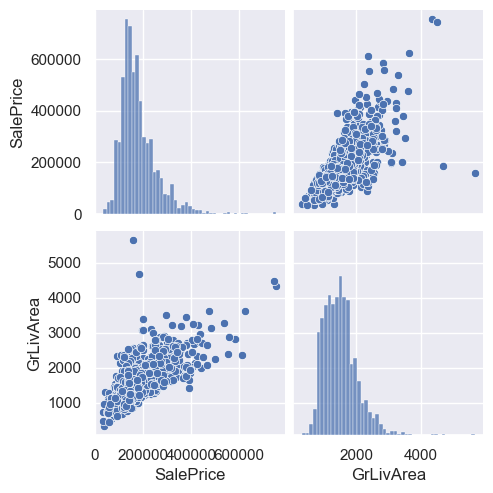

In [32]:
sns.pairplot(new_df)

In [33]:
import numpy as np

# Определение границ выбросов с использованием метода IQR
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация выбросов
filtered_df = new_df[(new_df >= lower_bound) & (new_df <= upper_bound)].dropna()


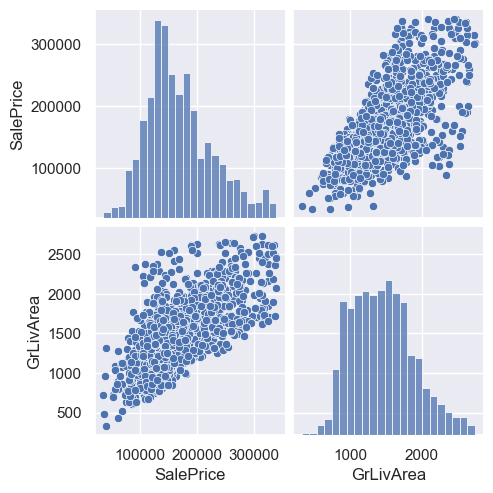

In [34]:
sns.pairplot(filtered_df)

In [35]:
filtered_df

,SalePrice,GrLivArea
0,208500.0,1710.0
1,181500.0,1262.0
2,223500.0,1786.0
3,140000.0,1717.0
4,250000.0,2198.0
...,...,...
1455,175000.0,1647.0
1456,210000.0,2073.0
1457,266500.0,2340.0
1458,142125.0,1078.0


In [36]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  1383 non-null   float64
 1   GrLivArea  1383 non-null   float64
dtypes: float64(2)
memory usage: 32.4 KB


In [37]:
# Ваш код здесь
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = filtered_df.drop('SalePrice', axis=1)
y = filtered_df['SalePrice']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [39]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression

# Создание объекта модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающих данных
model.fit(X_train, y_train)



LinearRegression()

In [40]:
# Ваш код здесь
# Получение предсказаний на обучающих данных
y_pred_train = model.predict(X_train)

# Получение предсказаний на тестовых данных
y_pred_test = model.predict(X_test)


In [41]:
# Ваш код здесь
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Оценка качества модели на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(mae_train)
# Оценка качества модели на тестовой выборке
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Вывод результатов с использованием фигурных скобок
print("MAE на обучающей выборке: {:.2f}".format(mae_train))
print("MSE на обучающей выборке: {:.2f}".format(mse_train))
print("MAE на тестовой выборке: {:.2f}".format(mae_test))
print("MSE на тестовой выборке: {:.2f}".format(mse_test))

32158.89710799006
MAE на обучающей выборке: 32158.90
MSE на обучающей выборке: 1844331293.68
MAE на тестовой выборке: 30003.50
MSE на тестовой выборке: 1697497263.19


In [45]:
import pandas as pd

# Создание нового датафрейма
new_df_1 = pd.DataFrame()
new_df_1['y_train'] = y_train
new_df_1['y_pred_train'] = y_pred_train
new_df_1

,y_train,y_pred_train
279,192000.0,223835.936913
347,157500.0,172050.782657
369,162000.0,153868.862689
1197,144000.0,192231.761889
62,202500.0,161769.906445
...,...,...
1155,218000.0,168147.857428
1195,176000.0,169956.530095
1367,127000.0,171765.202762
913,145000.0,221932.070948


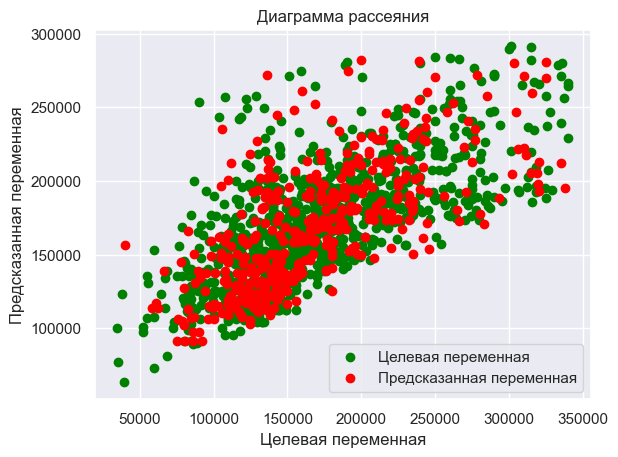

In [42]:
import matplotlib.pyplot as plt

# Построение диаграммы рассеяния для обучающей выборки
plt.scatter(y_train, y_train_pred, color='green', label='Целевая переменная')
# Построение диаграммы рассеяния для тестовой выборки
plt.scatter(y_test, y_pred_test, color='red', label='Предсказанная переменная')

plt.xlabel("Целевая переменная")
plt.ylabel("Предсказанная переменная")
plt.title("Диаграмма рассеяния")
plt.legend()
plt.show()


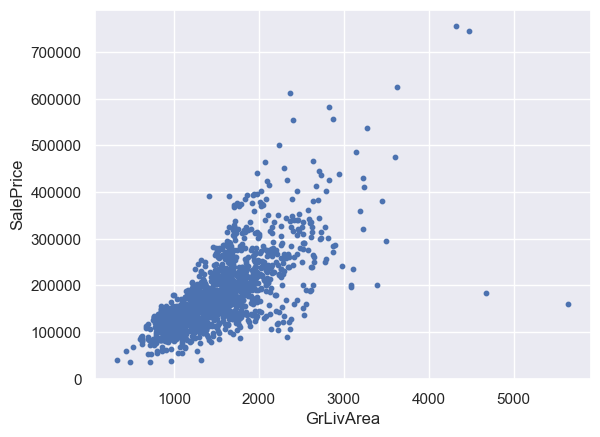

In [46]:
plt.scatter(df['GrLivArea'], df['SalePrice'], s=10)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [47]:
model = LinearRegression()

In [51]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(new_df, train_size=0.7, random_state=123) # random_state нужен для воспроизводимости результата

In [52]:
model.fit(train[['GrLivArea']], train[['SalePrice']])

LinearRegression()

In [53]:
y_predict_train = model.predict(train[['GrLivArea']])
print(y_predict_train[:, 0][:10])

[157813.90764333 116774.20184125 159688.81806068 147606.06203773
 242705.68487352 165730.19607215 221977.50859277 174896.42477922
 156251.48229553 130106.89814243]


In [54]:
print('w_0:', model.intercept_)
print('w_1:', model.coef_)

w_0: [21778.74069531]
w_1: [[104.16168985]]


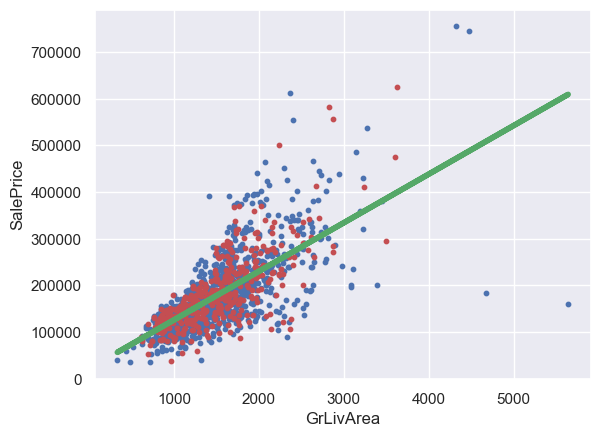

In [58]:
plt.plot(train['GrLivArea'], y_predict_train, linewidth=4, c='g')
plt.scatter(train['GrLivArea'], train['SalePrice'], s=10, c='b')
plt.scatter(test['GrLivArea'], test['SalePrice'], s=10, c='r')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [59]:
y_predict_test = model.predict(test[['GrLivArea']])

In [61]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train[['SalePrice']], y_predict_train)
test_mse = mean_squared_error(test[['SalePrice']], y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 3404558866.374771
Test MSE: 2537798540.5539823


In [68]:
import pandas as pd

# Определение функции для удаления выбросов
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Список столбцов, из которых нужно удалить выбросы
columns_to_remove_outliers = ['SalePrice', 'GrLivArea', 'GarageArea', 'OverallQual']

# Удаление выбросов из датафрейма
new_dataframe = remove_outliers(new_dataframe, columns_to_remove_outliers)


In [65]:
new_dataframe = df.loc[:, ['SalePrice', 'GrLivArea', 'GarageArea', 'OverallQual', 'Street_Grvl', 'Street_Pave']]
new_dataframe

,SalePrice,GrLivArea,GarageArea,OverallQual,Street_Grvl,Street_Pave
0,208500,1710,548,7,0,1
1,181500,1262,460,6,0,1
2,223500,1786,608,7,0,1
3,140000,1717,642,7,0,1
4,250000,2198,836,8,0,1
...,...,...,...,...,...,...
1455,175000,1647,460,6,0,1
1456,210000,2073,500,6,0,1
1457,266500,2340,252,7,0,1
1458,142125,1078,240,5,0,1


In [69]:
new_dataframe

,SalePrice,GrLivArea,GarageArea,OverallQual,Street_Grvl,Street_Pave
0,208500,1710,548,7,0,1
1,181500,1262,460,6,0,1
2,223500,1786,608,7,0,1
3,140000,1717,642,7,0,1
4,250000,2198,836,8,0,1
...,...,...,...,...,...,...
1455,175000,1647,460,6,0,1
1456,210000,2073,500,6,0,1
1457,266500,2340,252,7,0,1
1458,142125,1078,240,5,0,1


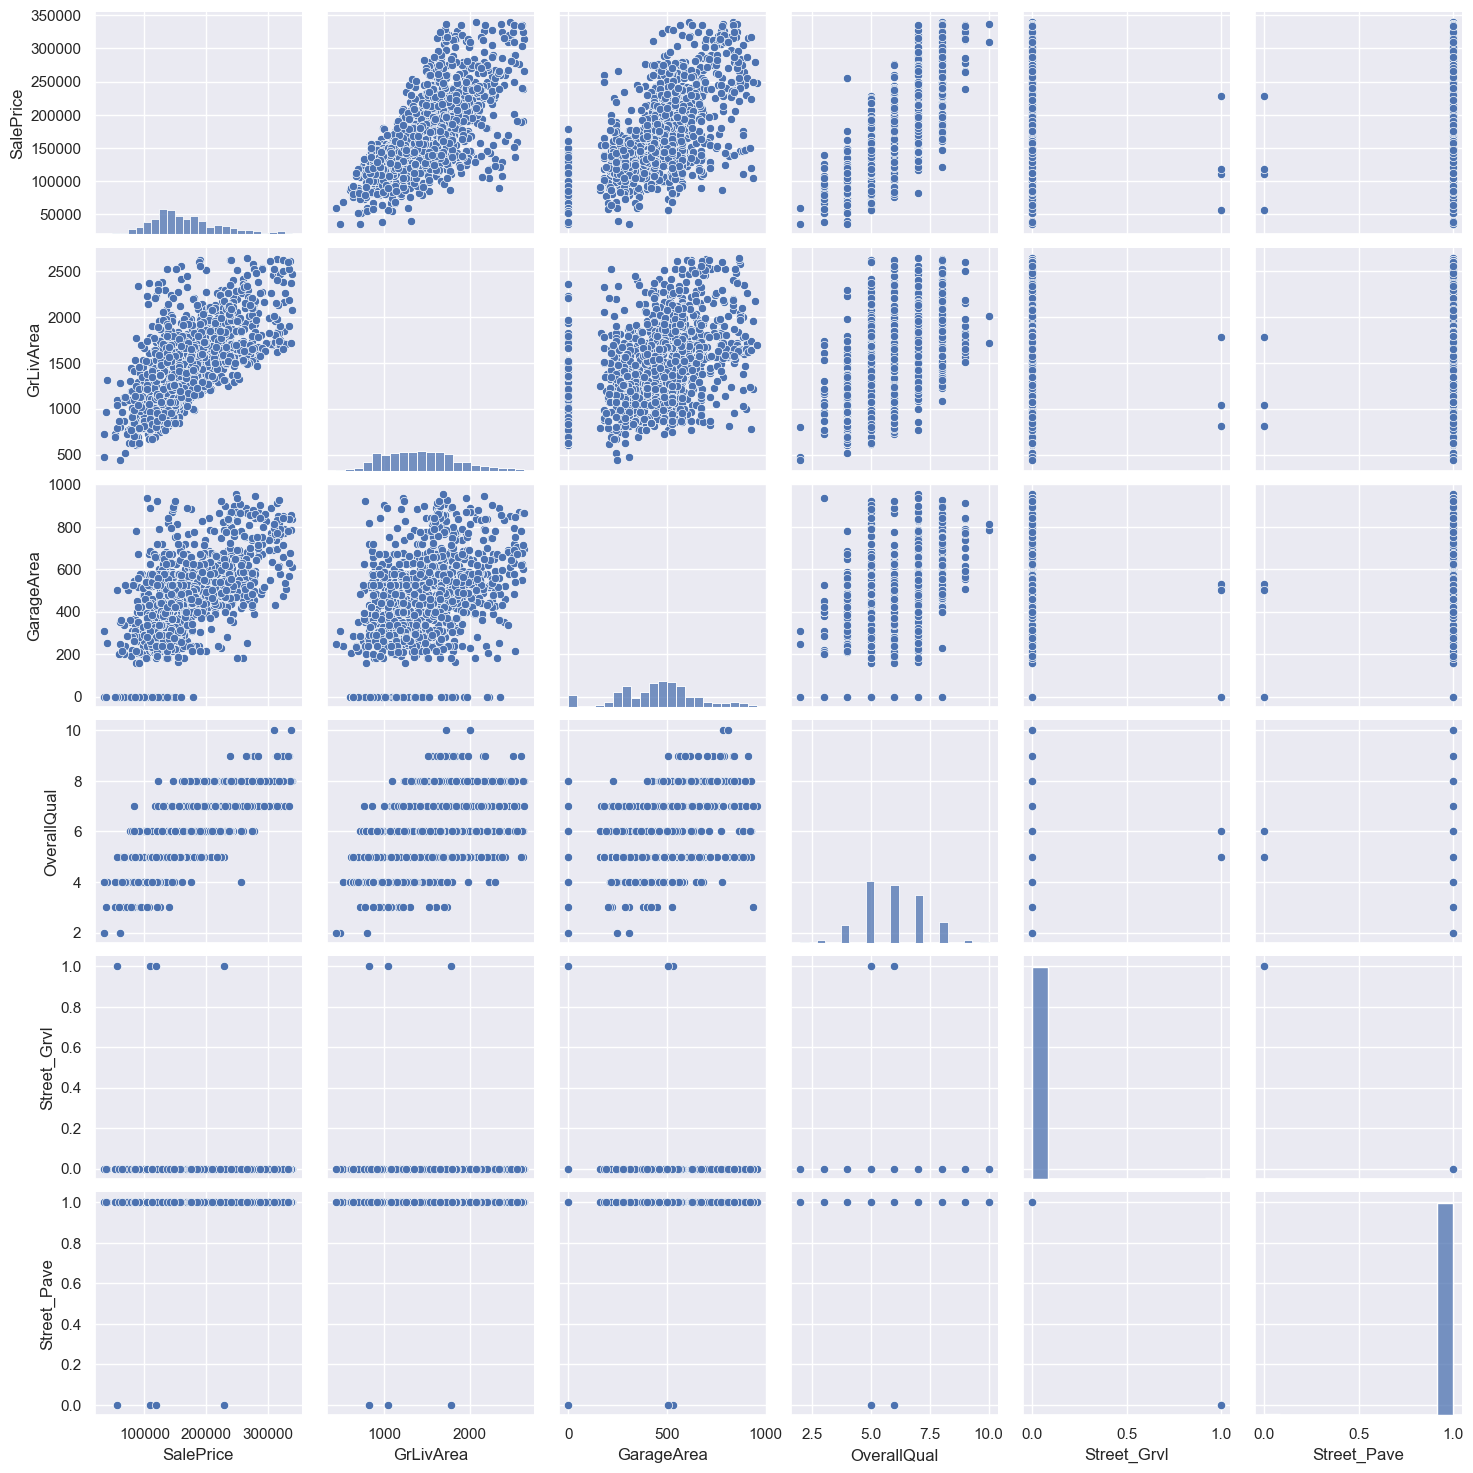

In [70]:
sns.pairplot(new_dataframe)

In [71]:
# Ваш код здесь
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = new_dataframe.drop('SalePrice', axis=1)
y = new_dataframe['SalePrice']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [84]:
y_train

956     124000
781     175900
531     128000
505     124500
1321     72500
         ...  
1167    173000
1209    290000
1383    112000
923     193000
1205    271900
Name: SalePrice, Length: 956, dtype: int64

In [72]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression

# Создание объекта модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающих данных
model.fit(X_train, y_train)



LinearRegression()

In [73]:
# Ваш код здесь
# Получение предсказаний на обучающих данных
y_pred_train = model.predict(X_train)

# Получение предсказаний на тестовых данных
y_pred_test = model.predict(X_test)


In [74]:
# Ваш код здесь
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Оценка качества модели на обучающей выборке
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(mae_train)
# Оценка качества модели на тестовой выборке
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Вывод результатов с использованием фигурных скобок
print("MAE на обучающей выборке: {:.2f}".format(mae_train))
print("MSE на обучающей выборке: {:.2f}".format(mse_train))
print("MAE на тестовой выборке: {:.2f}".format(mae_test))
print("MSE на тестовой выборке: {:.2f}".format(mse_test))

21193.25975755317
MAE на обучающей выборке: 21193.26
MSE на обучающей выборке: 790814252.42
MAE на тестовой выборке: 22410.30
MSE на тестовой выборке: 868255640.84


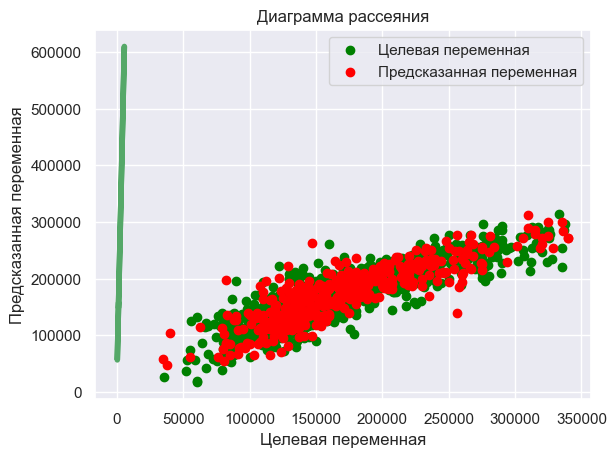

In [86]:
import matplotlib.pyplot as plt
plt.plot(train['GrLivArea'], y_predict_train, linewidth=4, c='g')
# Построение диаграммы рассеяния для обучающей выборки
plt.scatter(y_train, y_train_pred, color='green', label='Целевая переменная')
# Построение диаграммы рассеяния для тестовой выборки
plt.scatter(y_test, y_pred_test, color='red', label='Предсказанная переменная')

plt.xlabel("Целевая переменная")
plt.ylabel("Предсказанная переменная")
plt.title("Диаграмма рассеяния")
plt.legend()
plt.show()


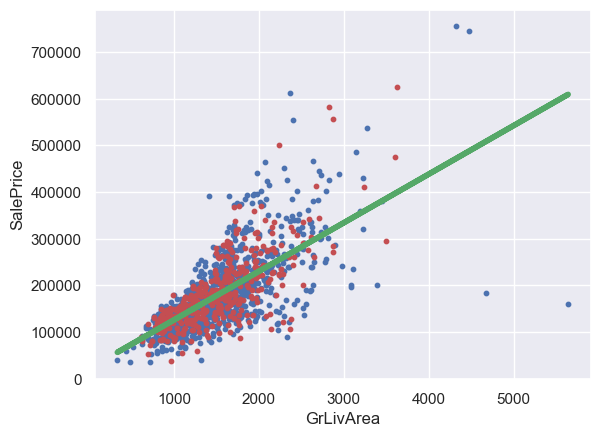

In [78]:
plt.plot(train['GrLivArea'], y_predict_train, linewidth=4, c='g')
plt.scatter(train['GrLivArea'], train['SalePrice'], s=10, c='b')
plt.scatter(test['GrLivArea'], test['SalePrice'], s=10, c='r')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [87]:
# Вывод коэффициентов модели
coefficients = model.coef_
intercept = model.intercept_

print("Коэффициенты модели:")
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")

print("Intercept:", intercept)

Коэффициенты модели:
GrLivArea: 44.52561717984177
GarageArea: 75.19108266118764
OverallQual: 22536.670913989357
Street_Grvl: -4075.4125173799407
Street_Pave: 4075.412517379943
Intercept: -67976.38455654666


In [77]:
# Создание нового датафрейма
new_df_2 = pd.DataFrame()
new_df_2['y_train'] = y_train
new_df_2['y_pred_train'] = y_pred_train
new_df_2

,y_train,y_pred_train
956,124000,160779.317148
781,175900,179086.101792
531,128000,169708.867540
505,124500,166129.025268
1321,72500,57347.325796
...,...,...
1167,173000,181211.550768
1209,290000,227900.461122
1383,112000,155140.720070
923,193000,183393.823483


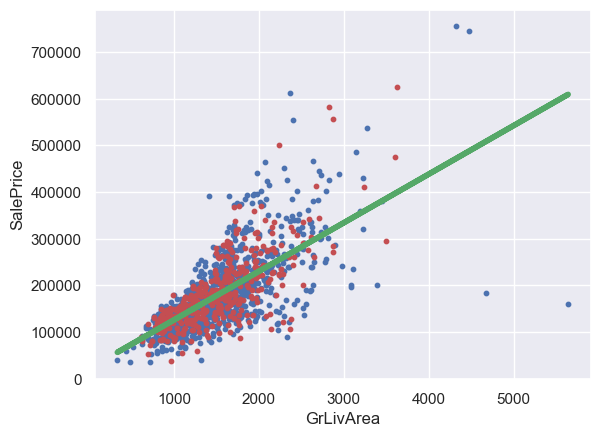

In [78]:
plt.plot(train['GrLivArea'], y_predict_train, linewidth=4, c='g')
plt.scatter(train['GrLivArea'], train['SalePrice'], s=10, c='b')
plt.scatter(test['GrLivArea'], test['SalePrice'], s=10, c='r')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

ValueError: x and y must be the same size

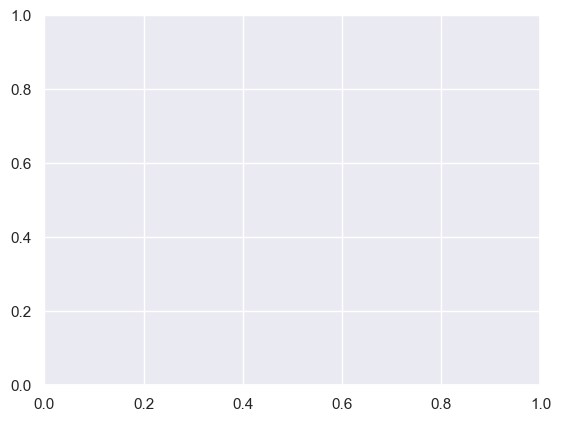

In [90]:
# Генерация значений для построения графика
x_values = X  # Замените X на соответствующий вектор признаков из вашего датафрейма
y_values = y_pred_train#model.predict(X)  # Предсказание значений y на основе модели

# Построение графика
plt.scatter(x_values, y_values, color='blue', label='Данные')
plt.plot(x_values, y_values, color='red', label='Регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.title('График регрессии')
plt.legend()
plt.show()

In [91]:
x_values

,GrLivArea,GarageArea,OverallQual,Street_Grvl,Street_Pave
0,1710,548,7,0,1
1,1262,460,6,0,1
2,1786,608,7,0,1
3,1717,642,7,0,1
4,2198,836,8,0,1
...,...,...,...,...,...
1455,1647,460,6,0,1
1456,2073,500,6,0,1
1457,2340,252,7,0,1
1458,1078,240,5,0,1


In [92]:
y_values

array([160779.31714826, 179086.10179207, 169708.86753963, 166129.02526774,
        57347.32579605, 141390.09529022,  93097.70749565, 245116.10460231,
       119816.32378965, 160383.2726853 , 204085.53219052, 256317.9761385 ,
       122292.82150082, 170855.4493098 , 158495.04606821, 160312.40028413,
       223537.50586084, 140657.03153097, 127974.89963824, 168235.36316597,
       108907.54758059, 104965.73197208, 140657.03153097, 169900.31268724,
       179399.29578098, 125459.29652315, 217621.32942532, 130636.04876435,
       133295.92707179, 204073.93044121, 131913.94898367, 105110.26156301,
       133121.8616848 , 261116.38302689, 101276.69244216, 285630.42651614,
       189317.59342247,  54296.85044009, 163618.95467879, 204798.46915034,
       213714.33828902, 205870.72549657, 202204.20270557, 162350.19076972,
       201894.95107458, 154093.7185884 , 106150.42195033, 192011.4779053 ,
       181034.7936814 , 203609.78945226, 240791.78463428, 110342.63331003,
       182549.1725262 , 1

No handles with labels found to put in legend.


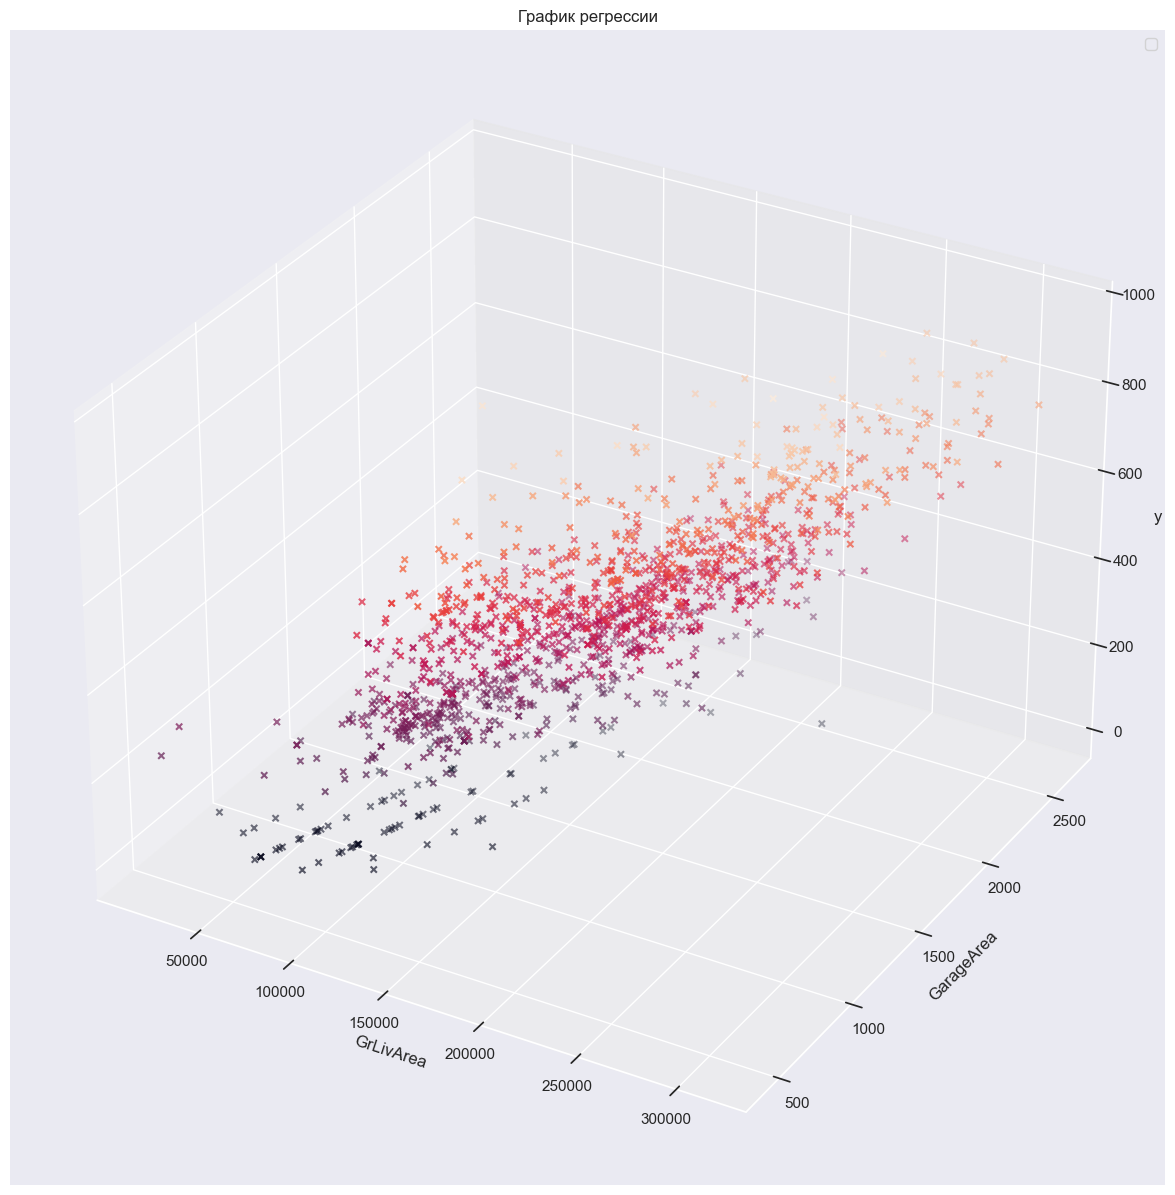

In [191]:
import matplotlib.pyplot as plt
import numpy as np

# Задание значений признаков
GrLivArea = X['GrLivArea']#np.linspace(0, 3000, 100)  # Замените значения на соответствующий диапазон для GrLivArea
GarageArea = X['GarageArea']#np.linspace(0, 1000, 100)  # Замените значения на соответствующий диапазон для GarageArea
OverallQual = X['OverallQual']#np.linspace(0, 10, 100)  # Замените значения на соответствующий диапазон для OverallQual
Street_Grvl = X['Street_Grvl']#np.zeros(100)  # Замените значения на соответствующие для Street_Grvl
Street_Pave = X['Street_Pave']#np.ones(100)  # Замените значения на соответствующие для Street_Pave

# Расчет значений целевой переменной
y_values = (-67976.38455654666 +
            44.52561717984177 * GrLivArea +
            75.19108266118764 * GarageArea +
            22536.670913989357 * OverallQual +
            -4075.4125173799407 * Street_Grvl +
            4075.412517379943 * Street_Pave)
# Увеличение размера графика
fig = plt.figure(figsize=(15, 15))  # Задайте желаемые размеры фигуры
# Построение графика
#fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(GarageArea, y_values, color='blue', label='Данные')
# ax.scatter(OverallQual, y_values, color='red', label='Данные')
# ax.scatter(GrLivArea, y_values, color='green', label='Данные')
# ax.scatter(Street_Grvl, y_values, color='yellow', label='Данные')
# ax.scatter(Street_Pave, y_values, color='pink', label='Данные')
ax.scatter(y_values, GrLivArea, GarageArea, c=GarageArea, marker='x')
ax.set_xlabel('GrLivArea')
ax.set_ylabel('GarageArea')
ax.set_zlabel('y')
ax.set_title('График регрессии')
plt.legend()
plt.show()


In [182]:
X

,GrLivArea,GarageArea,OverallQual,Street_Grvl,Street_Pave
0,1710,548,7,0,1
1,1262,460,6,0,1
2,1786,608,7,0,1
3,1717,642,7,0,1
4,2198,836,8,0,1
...,...,...,...,...,...
1455,1647,460,6,0,1
1456,2073,500,6,0,1
1457,2340,252,7,0,1
1458,1078,240,5,0,1


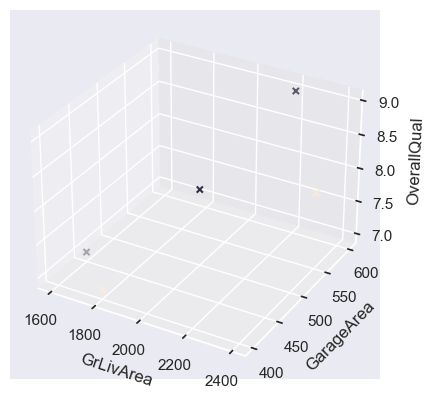

In [134]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Замените значения признаков на ваши собственные данные
GrLivArea = [2000, 1800, 2200, 2400, 1600]
GarageArea = [500, 400, 600, 550, 450]
OverallQual = [8, 7, 9, 8, 7]
Street_Grvl = [0, 1, 0, 1, 0]
Street_Pave = [1, 0, 1, 0, 1]

# Создание трехмерного графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Визуализация точек в трехмерном пространстве
ax.scatter(GrLivArea, GarageArea, OverallQual, c=Street_Grvl, marker='x')

# Настройка осей и меток
ax.set_xlabel('GrLivArea')
ax.set_ylabel('GarageArea')
ax.set_zlabel('OverallQual')

# Отображение графика
plt.show()


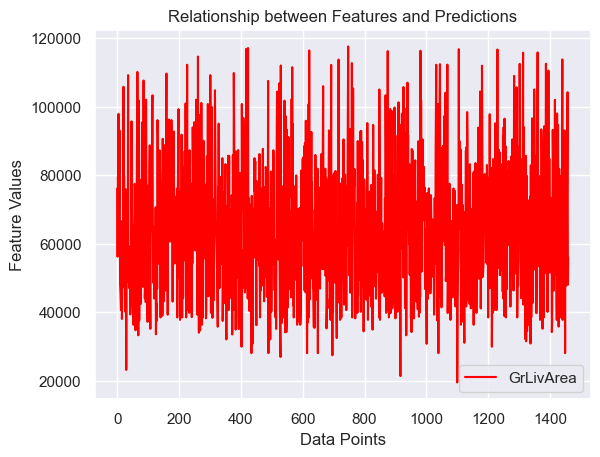

In [165]:
import matplotlib.pyplot as plt

# # Данные признака GrLivArea
# GrLivArea = [1500, 1800, 2200, 1600, 1900]

# # Данные признака GarageArea
# GarageArea = [400, 500, 600, 450, 550]

# # Данные признака OverallQual
# OverallQual = [7, 8, 9, 7, 8]

# # Данные признака Street_Grvl
# Street_Grvl = [0, 1, 0, 1, 0]

# # Данные признака Street_Pave
# Street_Pave = [1, 0, 1, 0, 1]
# Задание значений признаков
GrLivArea = X['GrLivArea']#np.linspace(0, 3000, 100)  # Замените значения на соответствующий диапазон для GrLivArea
GarageArea = X['GarageArea']#np.linspace(0, 1000, 100)  # Замените значения на соответствующий диапазон для GarageArea
OverallQual = X['OverallQual']#np.linspace(0, 10, 100)  # Замените значения на соответствующий диапазон для OverallQual
Street_Grvl = X['Street_Grvl']#np.zeros(100)  # Замените значения на соответствующие для Street_Grvl
Street_Pave = X['Street_Pave']#np.ones(100)  # Замените значения на соответствующие для Street_Pave

# График с несколькими линиями разных цветов
plt.plot(GrLivArea * 44.52561717984177, color='red', label='GrLivArea')
# plt.plot(GarageArea, color='blue', label='GarageArea')
# plt.plot(OverallQual, color='green', label='OverallQual')
# plt.plot(Street_Grvl, color='orange', label='Street_Grvl')
# plt.plot(Street_Pave, color='purple', label='Street_Pave')

plt.xlabel('Data Points')
plt.ylabel('Feature Values')
plt.title('Relationship between Features and Predictions')
plt.legend()
plt.show()


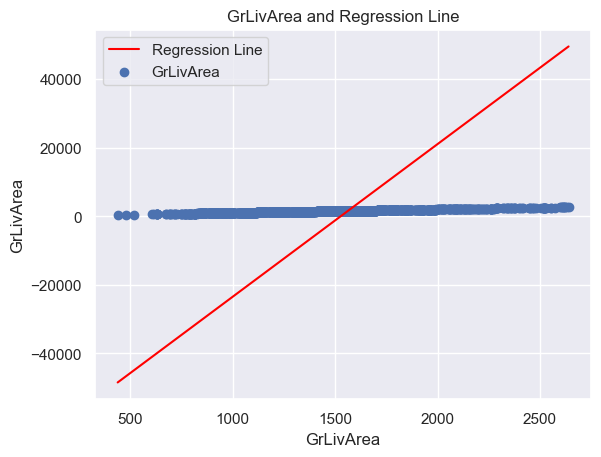

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Данные признака GrLivArea
#GrLivArea = [/* значения признака GrLivArea */]

# Уравнение линейной регрессии
intercept = -67976.38455654666
slope = 44.52561717984177

# Создание массива значений x для построения линии регрессии
x = np.linspace(min(GrLivArea), max(GrLivArea), 100)

# Вычисление значений y на основе уравнения линейной регрессии
y = intercept + slope * x

# График с признаком и линией регрессии
plt.scatter(GrLivArea, GrLivArea, label='GrLivArea')
plt.plot(x, y, color='red', label='Regression Line')

plt.xlabel('GrLivArea')
plt.ylabel('GrLivArea')
plt.title('GrLivArea and Regression Line')
plt.legend()
plt.show()


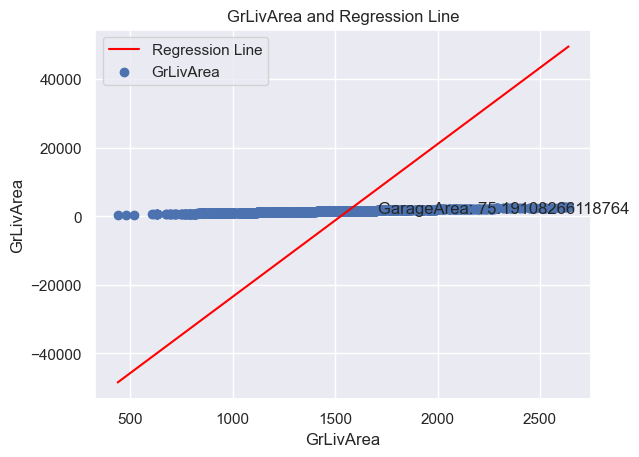

In [241]:
import matplotlib.pyplot as plt
import numpy as np

# Данные признака GrLivArea
GrLivArea

# Уравнение линейной регрессии
intercept = -67976.38455654666
slope = 44.52561717984177

# Создание массива значений x для построения линии регрессии
x = np.linspace(min(GrLivArea), max(GrLivArea), 100)

# Вычисление значений y на основе уравнения линейной регрессии
y = intercept + slope * x

# График с признаком и линией регрессии
plt.scatter(GrLivArea, GrLivArea, label='GrLivArea')
plt.plot(x, y, color='red', label='Regression Line')

# Вывод значения GarageArea
garage_area = 75.19108266118764
plt.text(GrLivArea[0], garage_area, f'GarageArea: {garage_area}', verticalalignment='bottom')

plt.xlabel('GrLivArea')
plt.ylabel('GrLivArea')
plt.title('GrLivArea and Regression Line')
plt.legend()
plt.show()


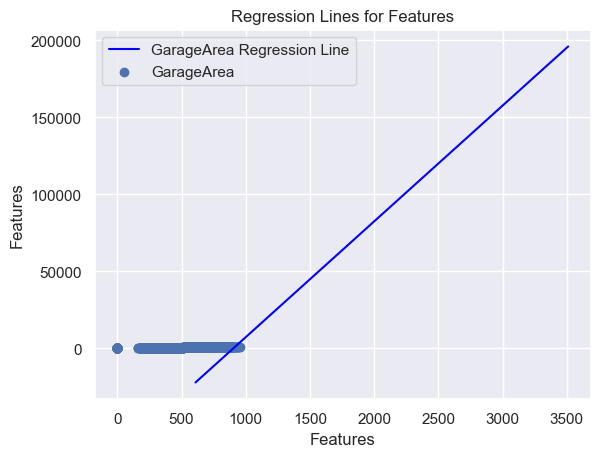

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Коэффициенты модели
coefficients = {
    'GrLivArea': 44.52561717984177,
    'GarageArea': 75.19108266118764,
    'OverallQual': 22536.670913989357,
    'Street_Grvl': -4075.4125173799407,
    'Street_Pave': 4075.412517379943,
    'Intercept': -67976.38455654666
}

# Данные признаков


# Создание массива значений x для построения линий регрессии
x = np.linspace(min(GrLivArea + GarageArea + OverallQual), max(GrLivArea + GarageArea + OverallQual), 100)

# Вычисление значений y на основе уравнений линейной регрессии
y_GrLivArea = coefficients['Intercept'] + coefficients['GrLivArea'] * x
# y_GarageArea = coefficients['Intercept'] + coefficients['GarageArea'] * x
# y_OverallQual = coefficients['Intercept'] + coefficients['OverallQual'] * x

# График с признаками и линиями регрессии
#plt.scatter(GrLivArea, GrLivArea, label='GrLivArea')
plt.scatter(GarageArea, GarageArea, label='GarageArea')
# plt.scatter(OverallQual, OverallQual, label='OverallQual')
#plt.plot(x, y_GrLivArea, color='red', label='GrLivArea Regression Line')
plt.plot(x, y_GarageArea, color='blue', label='GarageArea Regression Line')
#plt.plot(x, y_OverallQual, color='green', label='OverallQual Regression Line')

plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Regression Lines for Features')
plt.legend()
plt.show()


In [238]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Предположим, у вас есть модель с независимой переменной X и зависимой переменной Y
# model - ваша модель

# Рассчитываем остатки модели
residuals = model.resid

# Построение графика остатков от предсказанных значений
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()


AttributeError: 'LinearRegression' object has no attribute 'resid'

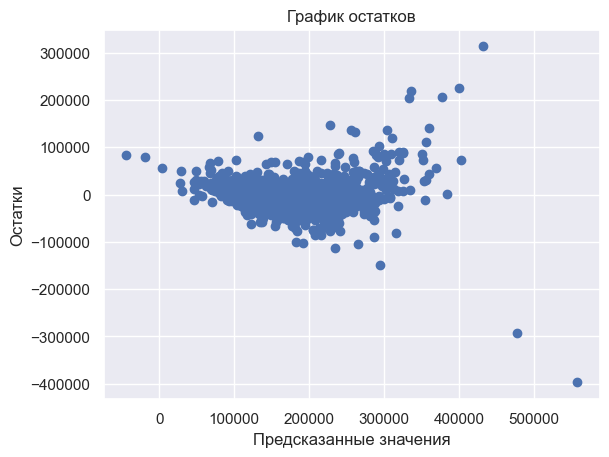

Дисперсия остатков: 1610445283.2600327


In [270]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Предположим, у вас есть данные X и Y
# X - независимая переменная
# Y - зависимая переменная

# # Создаем и обучаем модель LinearRegression
# model = LinearRegression()
# model.fit(X, Y)

# Получаем предсказанные значения
predicted_values = model.predict(X_train)

# Рассчитываем остатки
residuals =  y_train - predicted_values

# Построение графика остатков от предсказанных значений
plt.scatter(predicted_values, residuals)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

# Расчет дисперсии остатков
residual_variance = np.var(residuals)
print("Дисперсия остатков:", residual_variance)
